<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/Ufairah_Damara_Bashir_H071201091_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dimensionality Reduction**

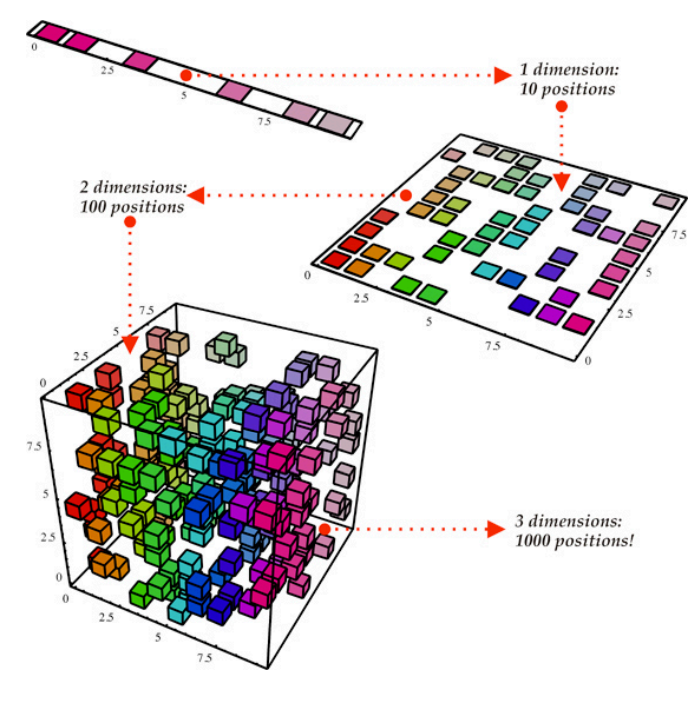

dapat dilihat di atas merupakan ilustrasi dari dimensional reduction. dimensional reduction adalah mentranformasikan suatu data berdimensi besar ke dimensi kecil. Cara transformasi data terdiri dari dua cara yaitu:
1. feature selection : data yang telah didapatkan dibuatkan perangkingan lalu kita pilih sebagian dari data-data tersebut. Misalkan setelah mengurutkan 100 data dan melakukan perangkingan terahadap data tersebut, saya mengambil 1-50 rangking teratas saja.
2. feature extraction : transoformasi dari pasangan bilangan m dan n yaitu M>n data ekstraksi yg pling umum digunakan adalah kombinasi linier
Kelebihannya: mempertahankan informasi yg ada
Kelemahan: lama dalam penggunaannya, tidak bisa menentukan yang mana nilai yg mendominasi karena nilai yg sudah dienstraksi fiturnya merupakan perpaduan dari berbagai nilai dominasi lainnya.



## **Preposessing**

### 1. import library

In [ ]:
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. import data melalui google

lalu saya melakukan mounting ke drive saya. mounting dapat dilakukan dengan melakukan step berikut:
1. klik link yang tertera saat memproses drive.mount
2. pilih akun yang akan ditautkan dengan G-colab
3. salin code yang muncul setelah menautkan akun

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. import data melalui akun kaggle

untuk data yang mempunyai penyimpanan data besar (berhubung data yang akan saya kelola berkisar 1.39G):

- ke akun kaggle
- ke profil dan ke bagian UPI
- kalau mau membuat token baru dengan cara klik create new UPI token dan otomatis terunduh file text yg isinya username dengan key-nya. lalu import os dan masukkan username dan key-nya

In [ ]:
os.environ['KAGGLE_USERNAME'] = "ufairahbashir"
os.environ['KAGGLE_KEY'] = "4bb11797aa62c6027e309f1b5c852efd"

selanjutnya adalah copy link dataset yang akan diambil **tapi hanya sampai tepat setelah kata kaggle.com.** nanti otomatis tersimpan di konten (konten adalah tempat file di bagian kiri) dalam bentuk arsip lalu nanti diekstra arsipnya. misalkan:

In [ ]:
!kaggle datasets download -d ruslankl/mice-protein-expression

  0% 0.00/423k [00:00<?, ?B/s]
100% 423k/423k [00:00<00:00, 94.9MB/s]


nanti file yang telah terunsuh dapat tampil pada bagian 'file' di sebelah kiri. lalu copy path-nya dan salin di sini

In [ ]:
!unzip -q /content/mice-protein-expression.zip

### 4. read data

In [ ]:
df = pd.read_csv("/content/mice-protein-expression.zip")
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

### 5. data.head

In [ ]:
df.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...  H3MeK4_N    CaNA_N  Treatment
0  0.503644  0.747193  0.430175  ...  0.128186  1.675652        1.0
1  0.514617  0.689064  0.411770  ...  0.131119  1.743610        1.0
2  0.509183  0.730247  0.418309  ...  0.127431  1.926427        1.0
3  0.442107  0.617076  0.358626  ...  0.146901  1.700563        1.0
4  0.434940  0.617430  0.358802  ...  0.148380  1.839730        1.0

[5 rows x 78 columns]

### 6. Mengecek data kosong

mengecek apakah terdapat data yang kosong

In [ ]:
df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [ ]:
df = df.drop(['MouseID','Behavior', 'Genotype', 'class'],axis=1)

df = df.fillna(df.mean())
df.head(20)

DYRK1A_N   ITSN1_N    BDNF_N  ...  H3MeK4_N    CaNA_N  Treatment
0   0.503644  0.747193  0.430175  ...  0.128186  1.675652        1.0
1   0.514617  0.689064  0.411770  ...  0.131119  1.743610        1.0
2   0.509183  0.730247  0.418309  ...  0.127431  1.926427        1.0
3   0.442107  0.617076  0.358626  ...  0.146901  1.700563        1.0
4   0.434940  0.617430  0.358802  ...  0.148380  1.839730        1.0
5   0.447506  0.628176  0.367388  ...  0.142180  1.816389        1.0
6   0.428033  0.573696  0.342709  ...  0.157499  1.528484        1.0
7   0.416923  0.564036  0.327703  ...  0.159409  1.652658        1.0
8   0.386311  0.538428  0.317720  ...  0.158235  1.834599        1.0
9   0.380827  0.499294  0.362462  ...  0.192334  1.516862        1.0
10  0.366511  0.513278  0.327792  ...  0.193055  1.613548        1.0
11  0.364154  0.499411  0.355124  ...  0.195529  1.722971        1.0
12  0.364873  0.482102  0.312539  ...  0.214088  1.426934        1.0
13  0.381911  0.485914  0.310951  ...  0.225285  1.500070        1.0
14  0.374410  0.462313  0.344629  ...  0.224212  1.613897        1.0
15  0.743118  0.862653  0.377742  ...  0.163995  1.297220        1.0
16  0.711480  0.807054  0.351591  ...  0.158206  1.363189        1.0
17  0.704633  0.802537  0.350110  ...  0.158543  1.404481        1.0
18  0.677359  0.770235  0.356397  ...  0.195739  1.170038        1.0
19  0.591572  0.678768  0.312480  ...  0.169977  1.272986        1.0

[20 rows x 78 columns]

In [ ]:
 df.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

### 7. mengecek tipe data 

In [ ]:
df.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Treatment    float64
Length: 78, dtype: object

In [ ]:
df["Treatment"].value_counts()

1.0    570
2.0    510
Name: Treatment, dtype: int64

In [ ]:
cleanup_nums = {"Treatment":     {"Memantine": 1.0, "Saline": 2.0}}
df.replace(cleanup_nums, inplace=True)
df.head()
df.dtypes

TypeError: ignored

In [ ]:
X = df.drop("Treatment",1)   #Feature Matrix
y = df["Treatment"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns) 

      DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0     0.503644  0.747193  0.430175  ...  0.131790  0.128186  1.675652
1     0.514617  0.689064  0.411770  ...  0.135103  0.131119  1.743610
2     0.509183  0.730247  0.418309  ...  0.133362  0.127431  1.926427
3     0.442107  0.617076  0.358626  ...  0.147444  0.146901  1.700563
4     0.434940  0.617430  0.358802  ...  0.140314  0.148380  1.839730
...        ...       ...       ...  ...       ...       ...       ...
1075  0.254860  0.463591  0.254860  ...  0.204660  0.328327  1.364823
1076  0.272198  0.474163  0.251638  ...  0.200415  0.293435  1.364478
1077  0.228700  0.395179  0.234118  ...  0.229193  0.355213  1.430825
1078  0.221242  0.412894  0.243974  ...  0.251317  0.365353  1.404031
1079  0.302626  0.461059  0.256564  ...  0.252995  0.365278  1.370999

[1080 rows x 77 columns]


### 8. data describe

**NOTES**

Untuk data numerik, indeks hasil akan mencakup hitungan, rata-rata, std, min, maks serta persentil bawah, 50 dan atas. Secara default, persentil bawah adalah 25 dan persentil atas adalah 75. Persentil 50 sama dengan median.

Untuk data objek (misalnya string atau cap waktu), indeks hasil akan menyertakan count, unique, top, dan freq. Bagian atas adalah nilai yang paling umum. Freq adalah frekuensi nilai yang paling umum. Stempel waktu juga mencakup item pertama dan terakhir.

Jika beberapa nilai objek memiliki jumlah tertinggi, maka jumlah dan hasil teratas akan dipilih secara sewenang-wenang dari antara mereka dengan jumlah tertinggi.

Untuk tipe data campuran yang disediakan melalui DataFrame, defaultnya adalah mengembalikan hanya analisis kolom numerik. Jika kerangka data hanya terdiri dari objek dan data kategorikal tanpa kolom numerik apa pun, defaultnya adalah mengembalikan analisis objek dan kolom kategoris. Jika include='all' disediakan sebagai opsi, hasilnya akan menyertakan gabungan atribut dari setiap jenis.

Parameter sertakan dan kecualikan dapat digunakan untuk membatasi kolom mana dalam DataFrame yang dianalisis untuk output. Parameter diabaikan saat menganalisis Seri.

In [ ]:
df.describe()

DYRK1A_N      ITSN1_N  ...       CaNA_N    Treatment
count  1080.000000  1080.000000  ...  1080.000000  1080.000000
mean      0.425810     0.617102  ...     1.337784     1.472222
std       0.249015     0.251290  ...     0.317126     0.499459
min       0.145327     0.245359  ...     0.586479     1.000000
25%       0.288163     0.473669  ...     1.081423     1.000000
50%       0.366540     0.566365  ...     1.317441     1.000000
75%       0.487574     0.697500  ...     1.585824     2.000000
max       2.516367     2.602662  ...     2.129791     2.000000

[8 rows x 78 columns]

### 9. Mix-Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [ ]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0  0.151122  0.212885  0.824638  ...  0.102890  0.084580  0.705738
1  0.155750  0.188226  0.776455  ...  0.115874  0.093977  0.749771
2  0.153459  0.205696  0.793572  ...  0.109050  0.082162  0.868229
3  0.125169  0.157688  0.637326  ...  0.164241  0.144543  0.721879
4  0.122146  0.157838  0.637787  ...  0.136298  0.149281  0.812053

[5 rows x 77 columns]

### 10. Visual Outliers

di luar dari area biru merupakan nilai outliers

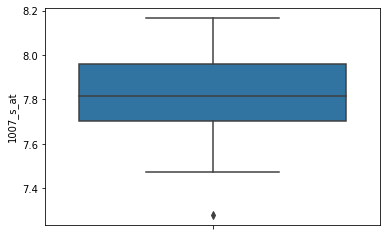

In [ ]:
sns.boxplot(y=data['1007_s_at'])

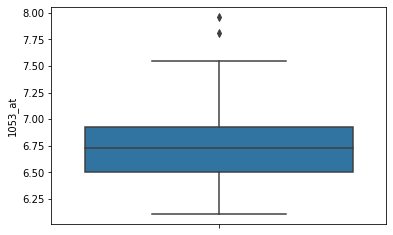

In [ ]:
sns.boxplot(y=data['1053_at'])

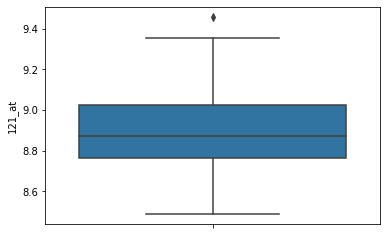

In [ ]:
sns.boxplot(y=data['121_at'])

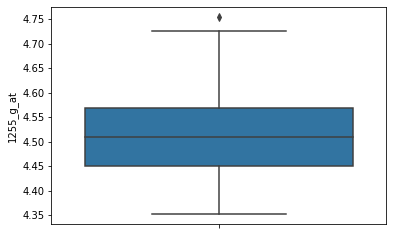

In [ ]:
sns.boxplot(y=data['1255_g_at'])

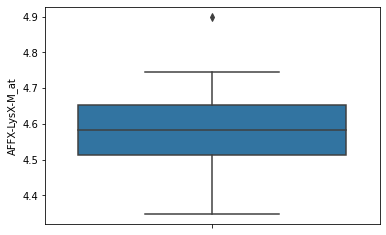

In [ ]:
sns.boxplot(y=data['AFFX-LysX-M_at'])

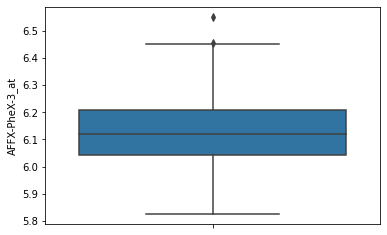

In [ ]:
sns.boxplot(y=data['AFFX-PheX-3_at'])

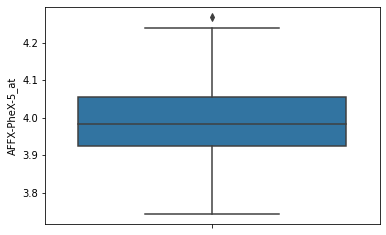

In [ ]:
sns.boxplot(y=data['AFFX-PheX-5_at'])

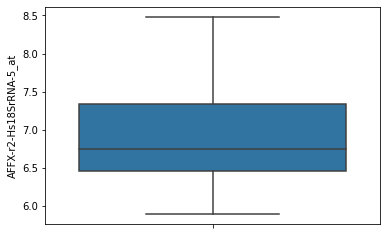

In [ ]:
sns.boxplot(y=data['AFFX-r2-Hs18SrRNA-5_at'])

In [ ]:
df = pd.concat([df, y], axis = 1)
df.head()

DYRK1A_N   ITSN1_N    BDNF_N  ...  H3MeK4_N    CaNA_N  Treatment
0  0.151122  0.212885  0.824638  ...  0.084580  0.705738        1.0
1  0.155750  0.188226  0.776455  ...  0.093977  0.749771        1.0
2  0.153459  0.205696  0.793572  ...  0.082162  0.868229        1.0
3  0.125169  0.157688  0.637326  ...  0.144543  0.721879        1.0
4  0.122146  0.157838  0.637787  ...  0.149281  0.812053        1.0

[5 rows x 78 columns]

In [ ]:
# category = pd.get_dummies(data.type)
# df_baru = pd.concat([data, category], axis=1)
# df_baru = df_baru.drop(columns='type')
# df_baru

### 11. Subplots

saya tidak memproses semua data karena data terlalu banyak

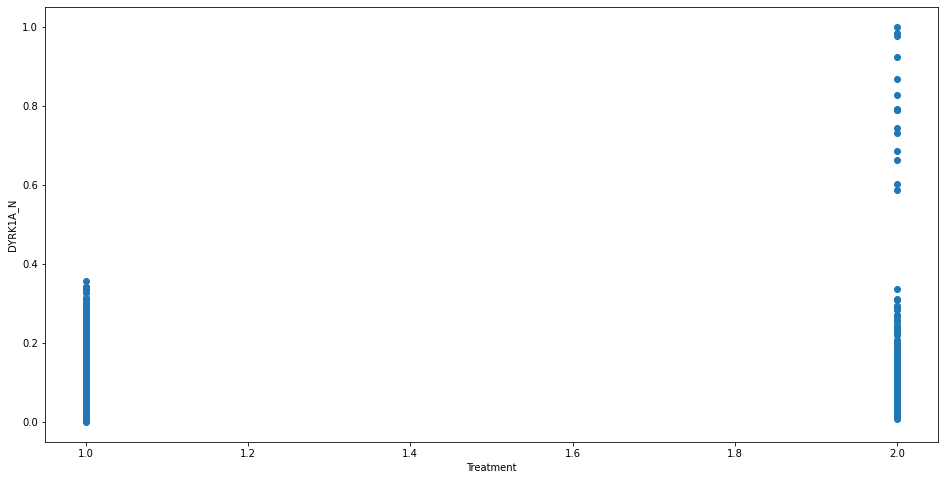

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Treatment'], df['DYRK1A_N'])
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

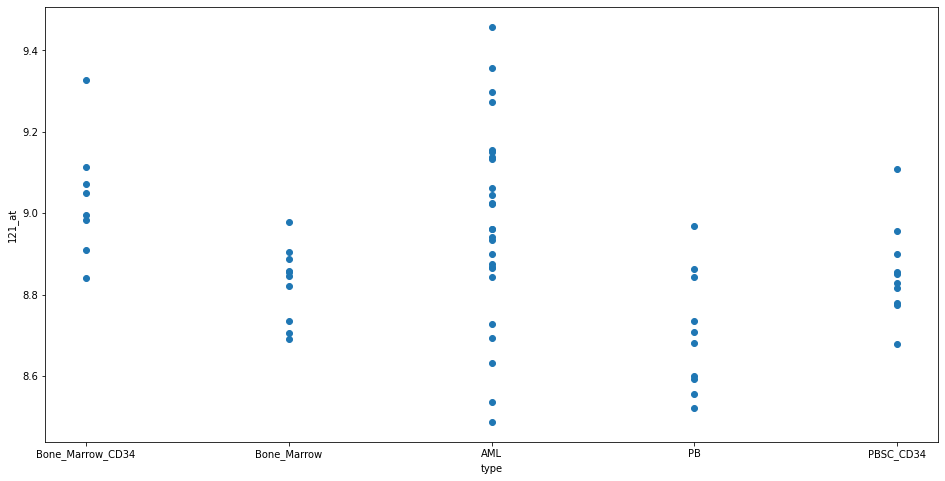

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['type'], data['121_at'])
ax.set_xlabel('type')
ax.set_ylabel('121_at')
plt.show()

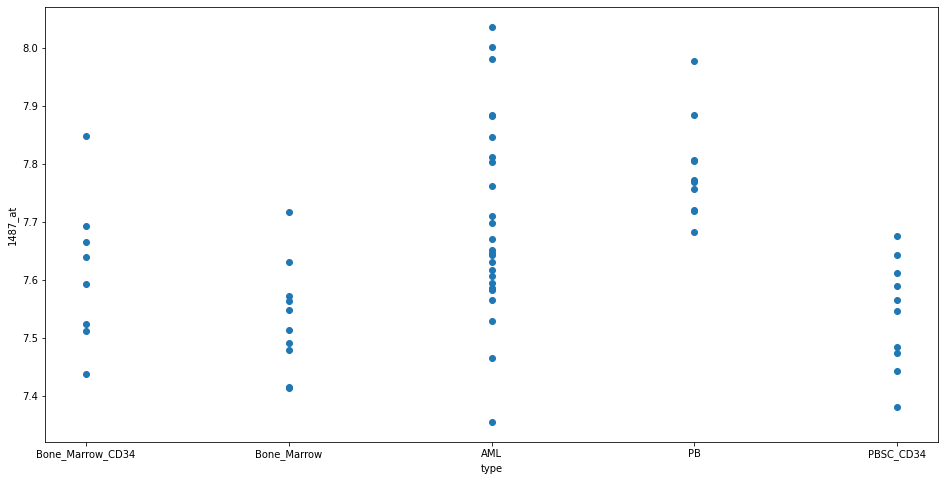

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['type'], data['1487_at'])
ax.set_xlabel('type')
ax.set_ylabel('1487_at')
plt.show()

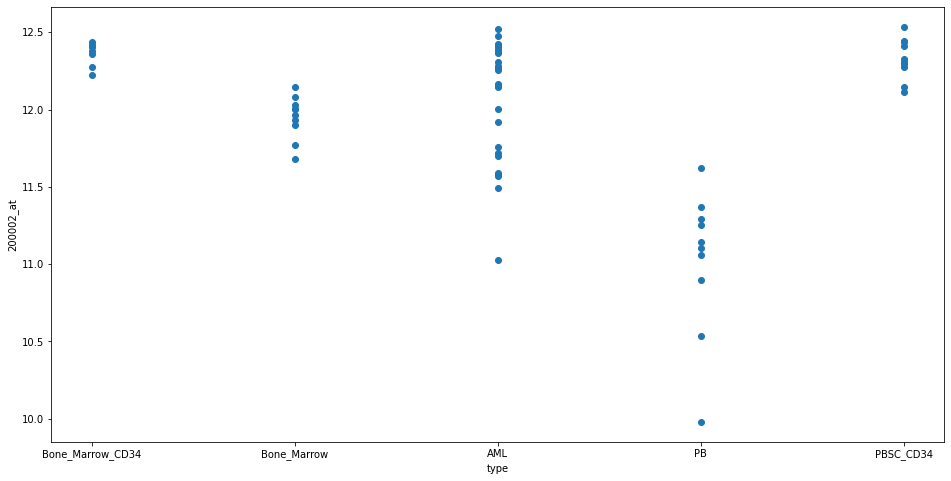

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['type'], data['200002_at'])
ax.set_xlabel('type')
ax.set_ylabel('200002_at')
plt.show()

### 12. Boxplot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

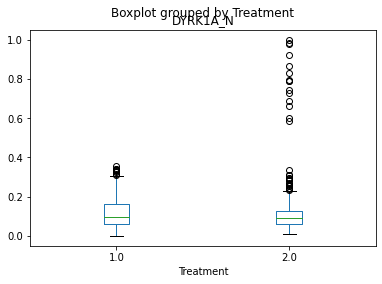

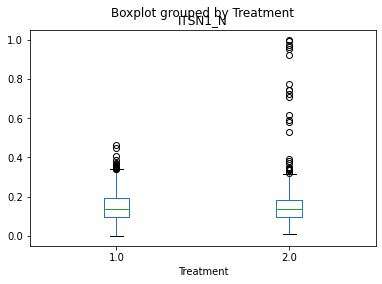

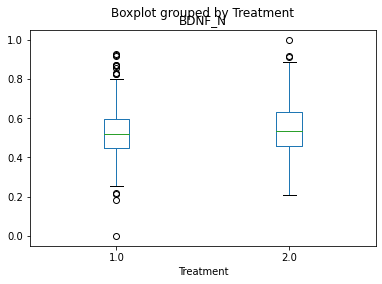

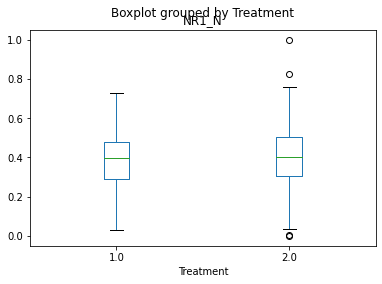

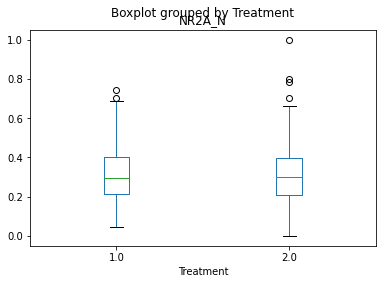

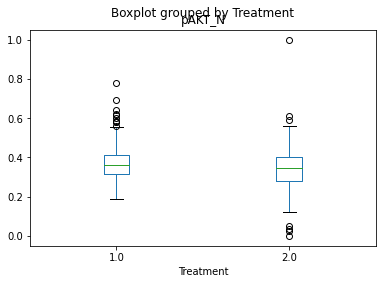

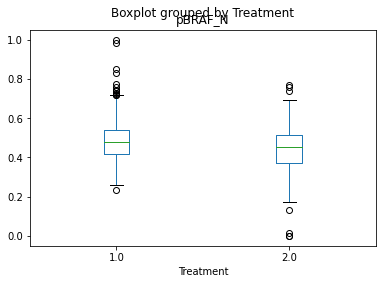

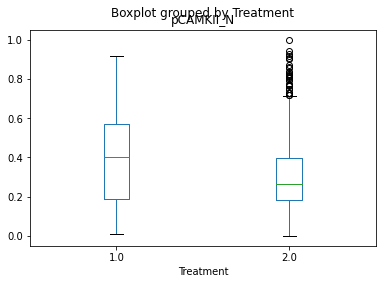

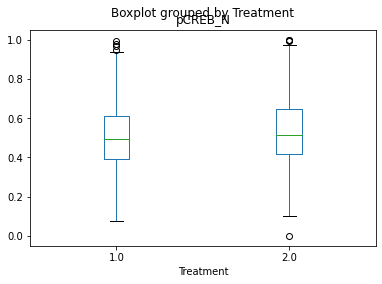

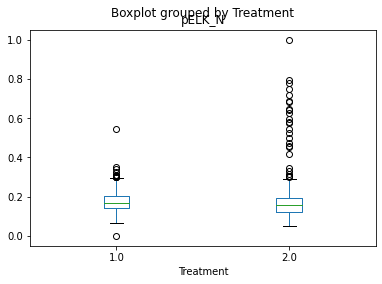

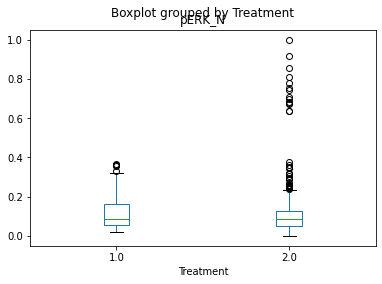

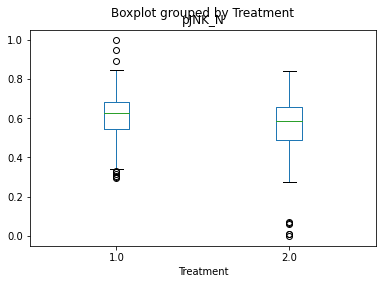

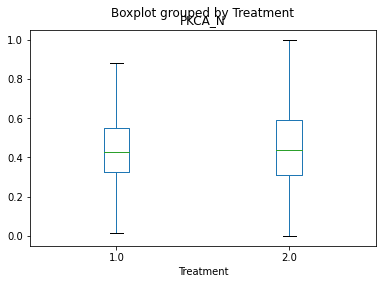

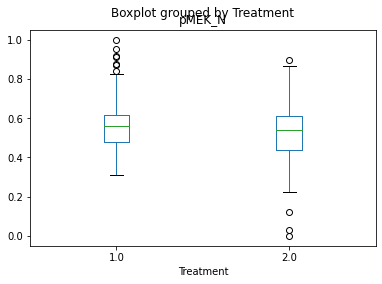

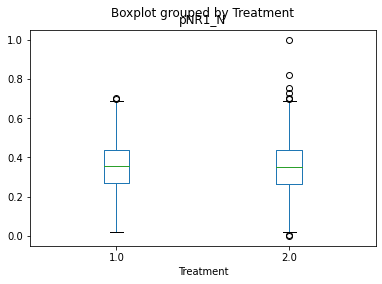

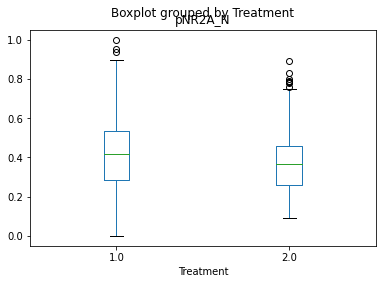

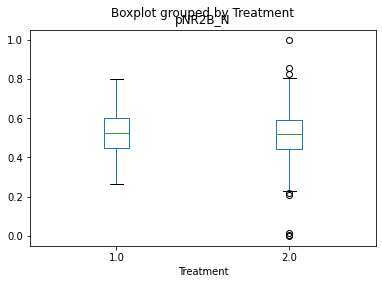

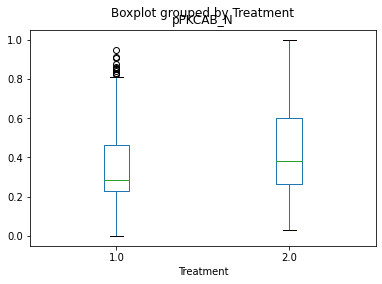

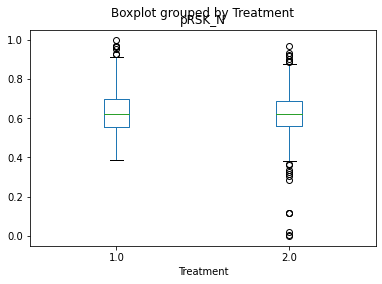

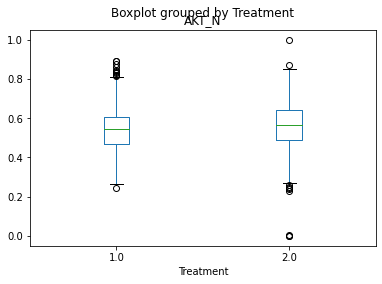

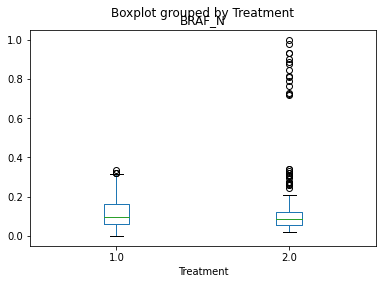

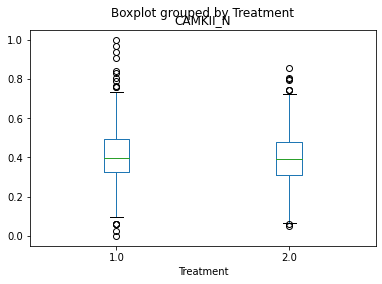

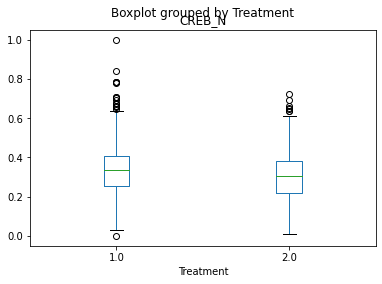

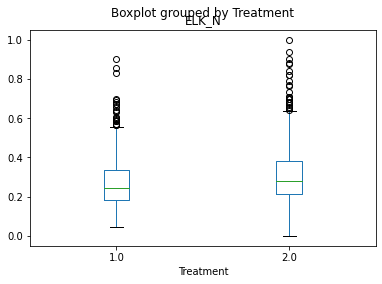

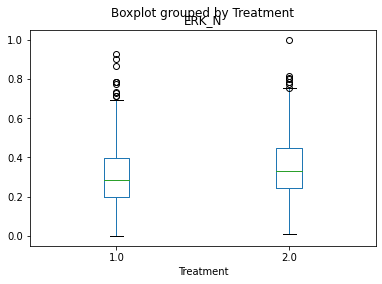

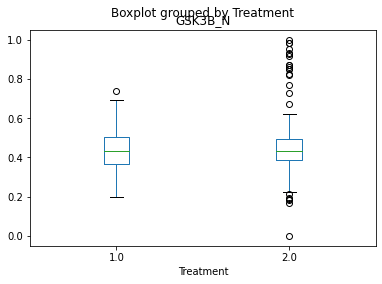

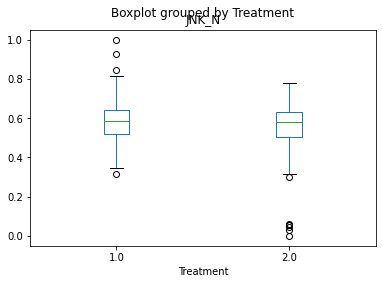

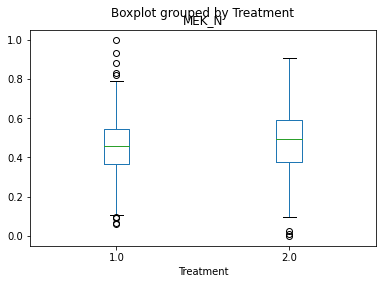

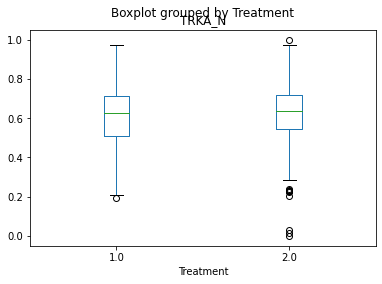

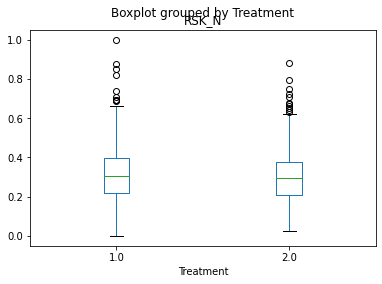

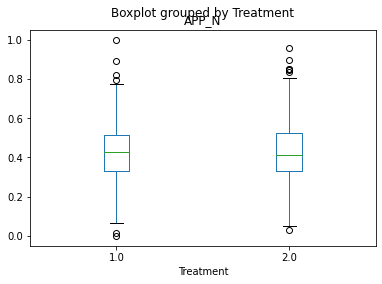

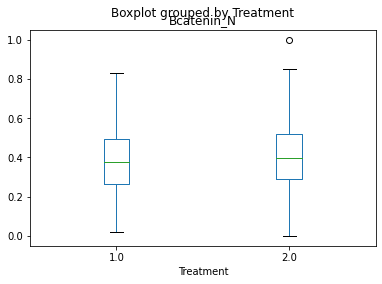

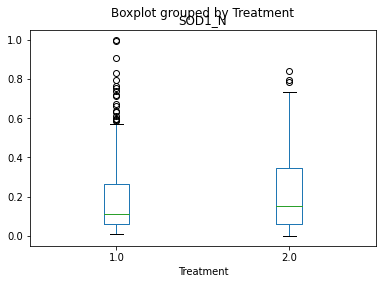

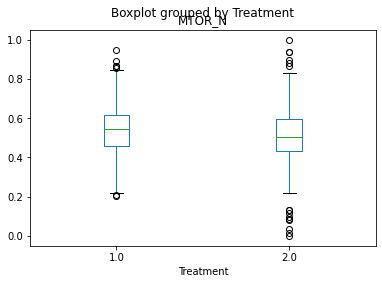

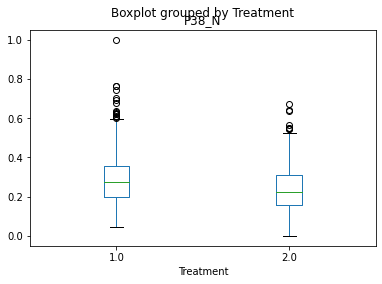

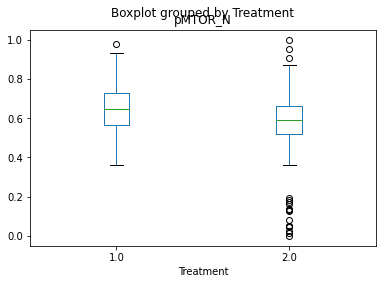

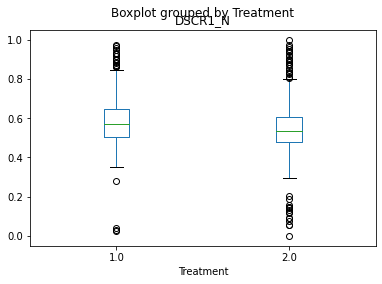

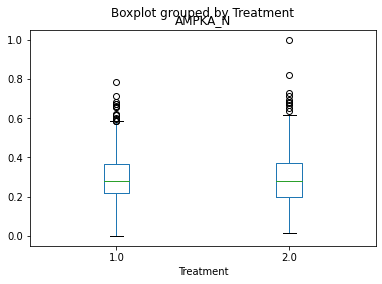

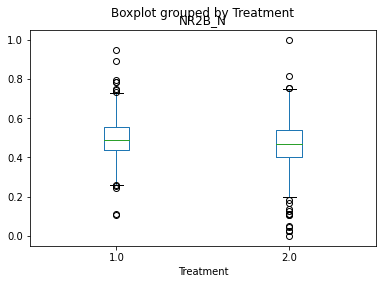

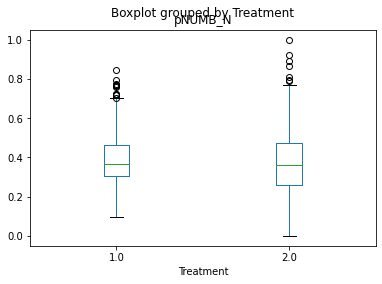

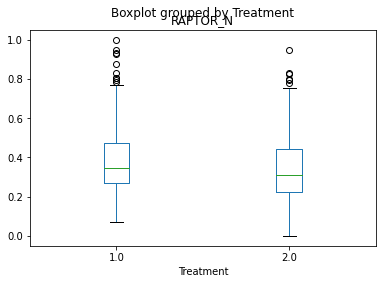

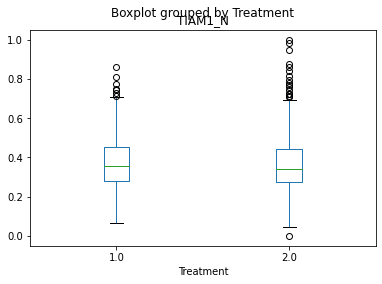

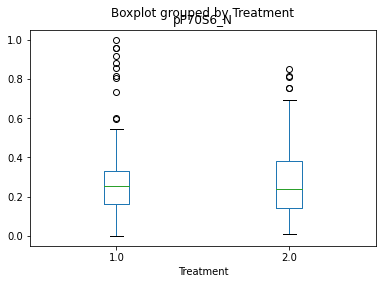

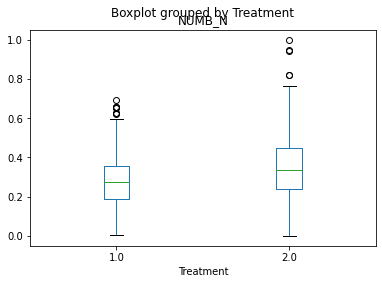

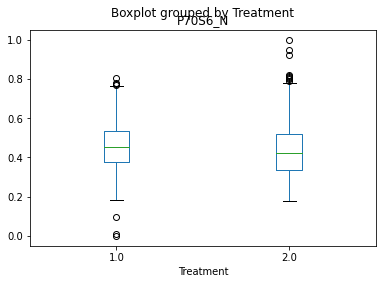

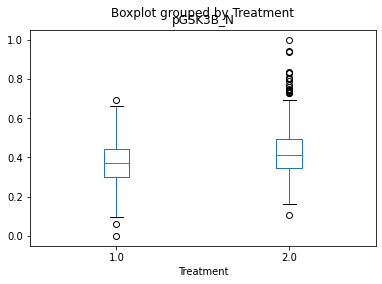

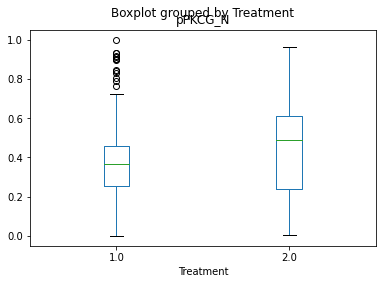

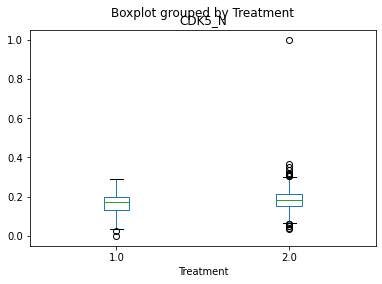

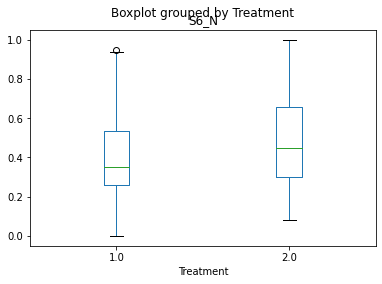

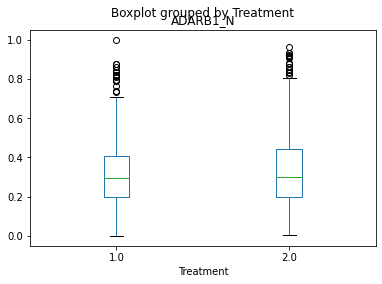

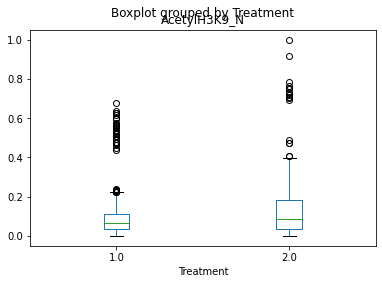

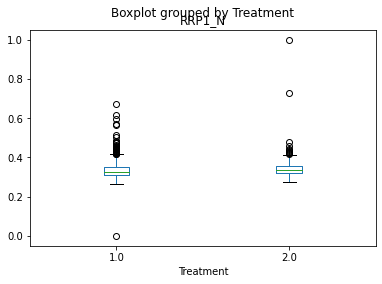

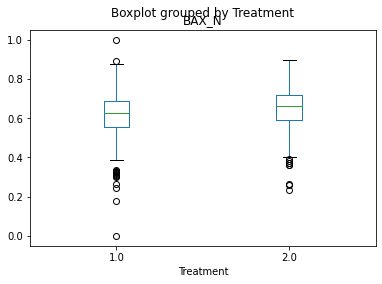

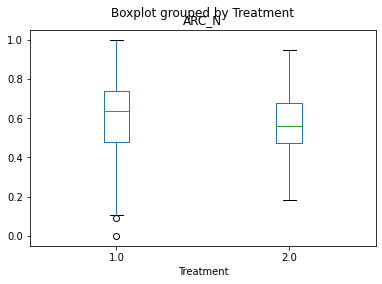

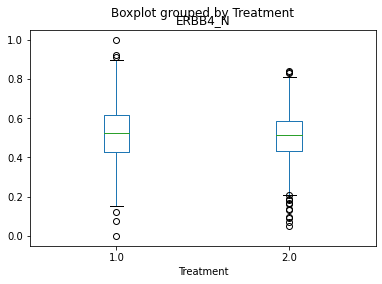

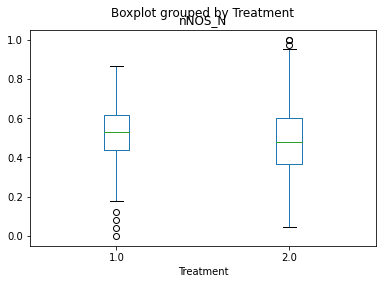

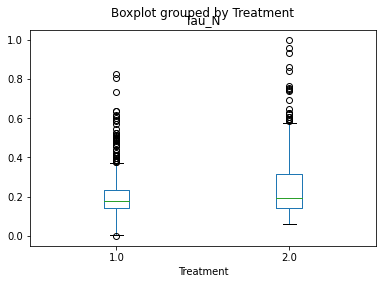

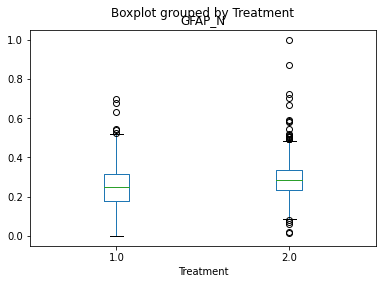

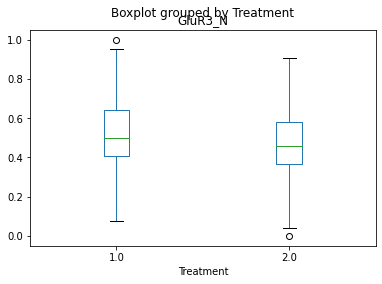

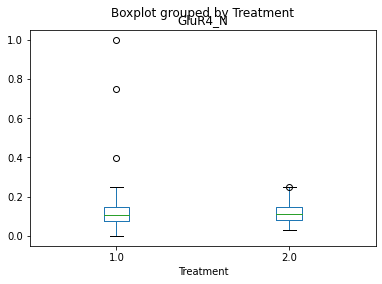

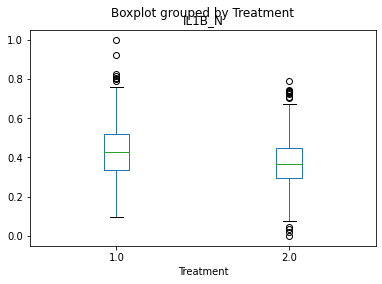

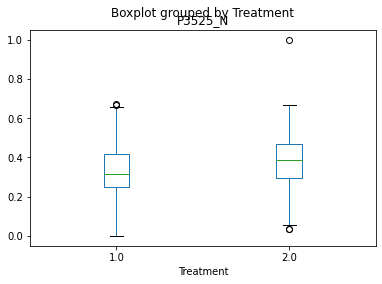

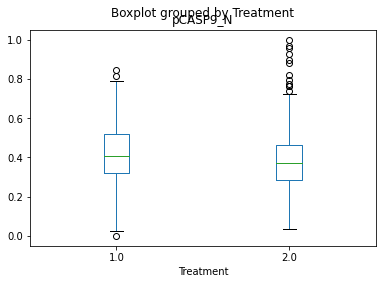

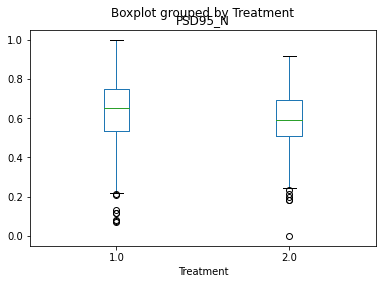

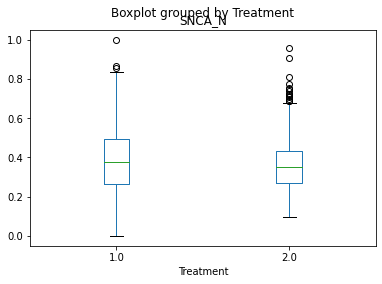

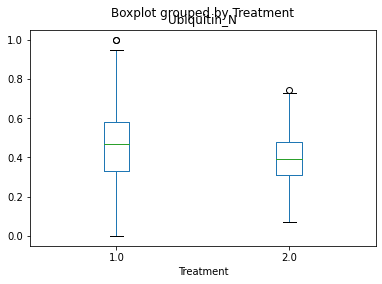

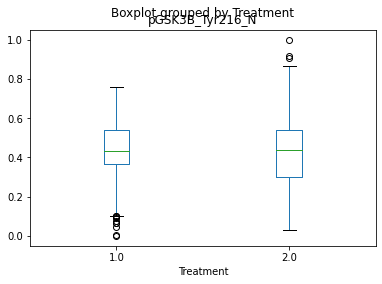

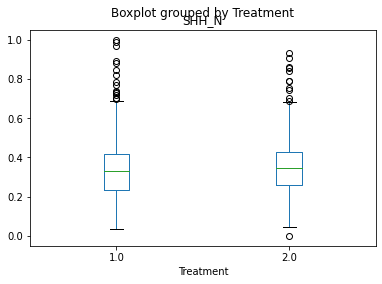

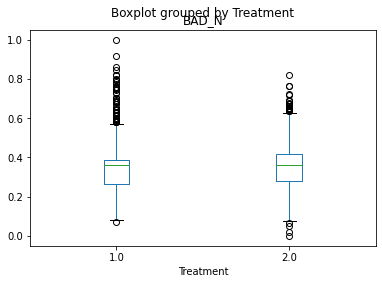

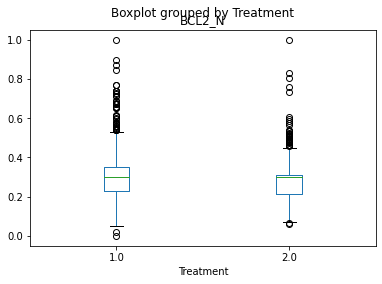

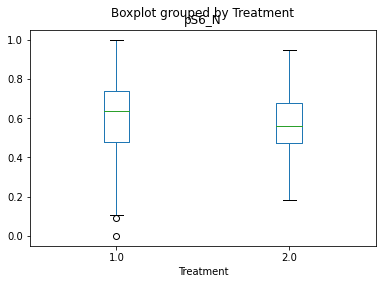

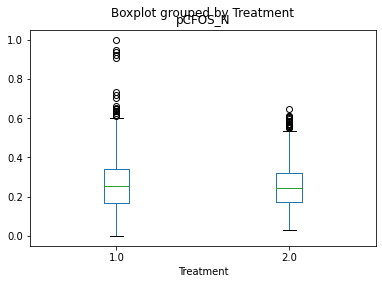

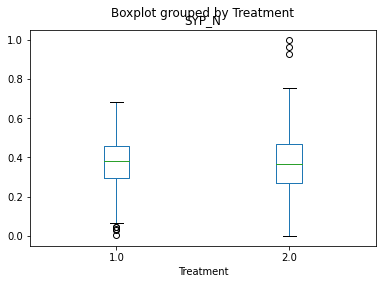

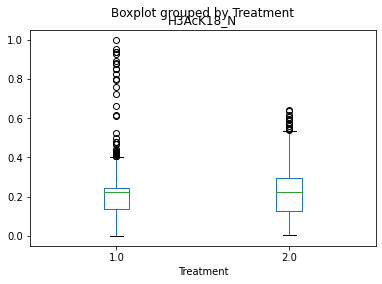

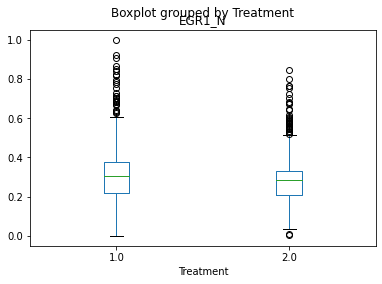

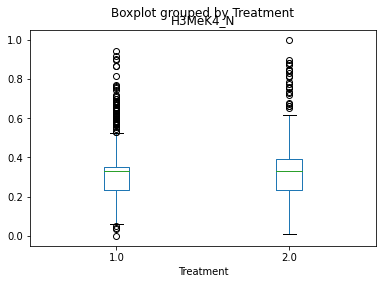

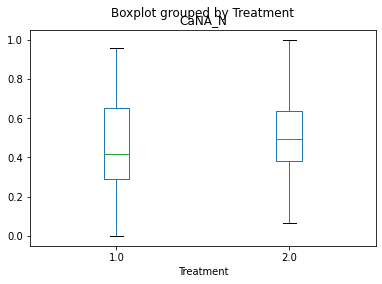

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("Treatment",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='Treatment', column =[i], grid = False) 

### 13. Quantil data

menampilkan quantile 2 dari data

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DYRK1A_N     0.084103
ITSN1_N      0.094952
BDNF_N       0.158094
NR1_N        0.193209
NR2A_N       0.187519
               ...   
H3AcK18_N    0.132987
EGR1_N       0.144874
H3MeK4_N     0.144086
CaNA_N       0.326830
Treatment    1.000000
Length: 78, dtype: float64


menampilkan row x columns

In [ ]:
print(df.shape)

(1080, 78)


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(543, 78)


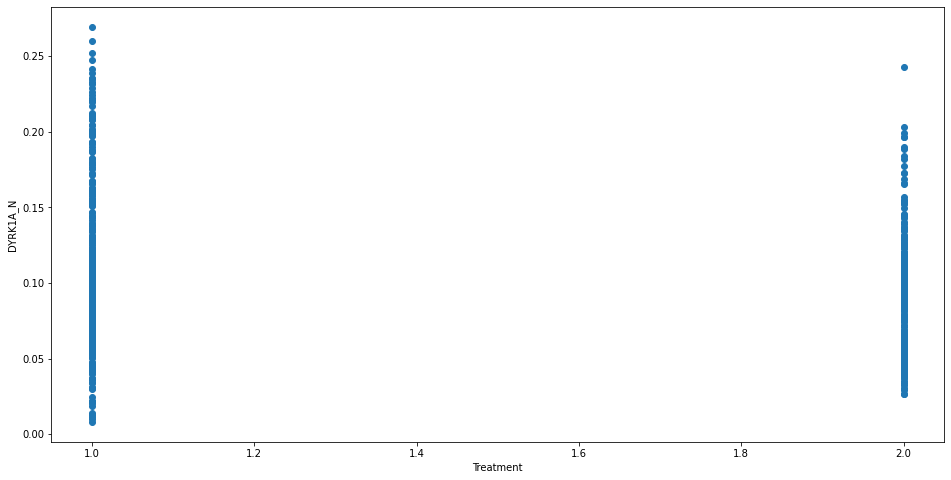

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['Treatment'], df_out['DYRK1A_N'])
ax.set_xlabel('Treatment')
ax.set_ylabel('DYRK1A_N')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

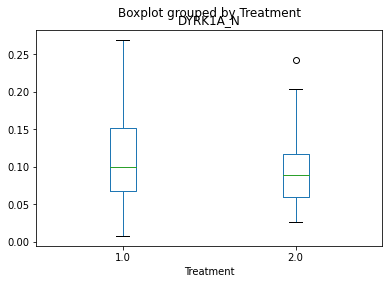

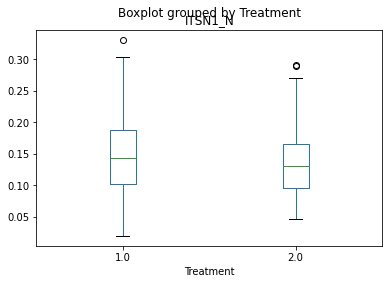

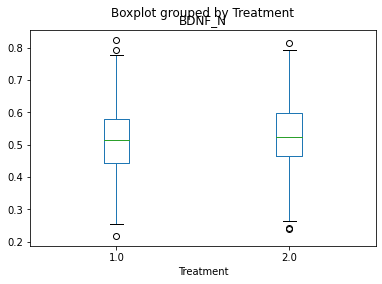

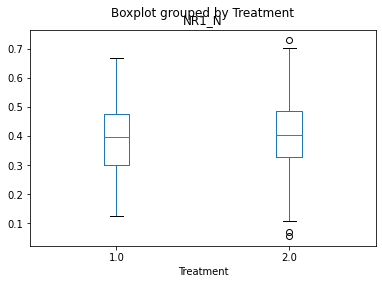

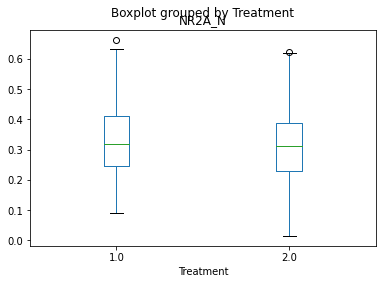

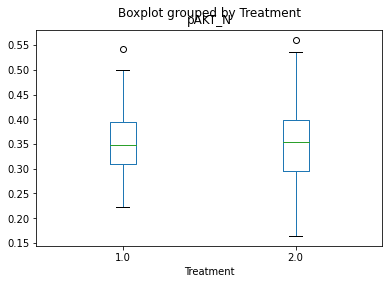

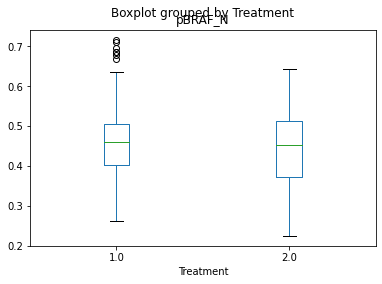

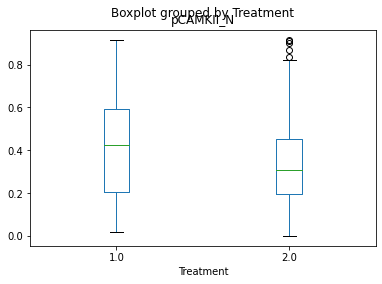

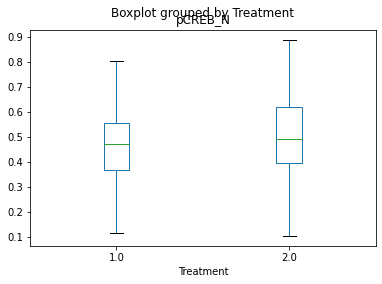

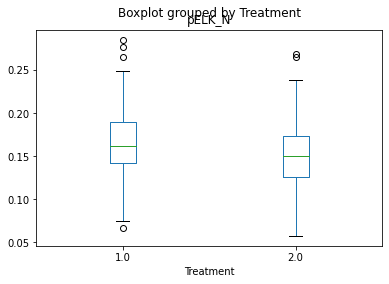

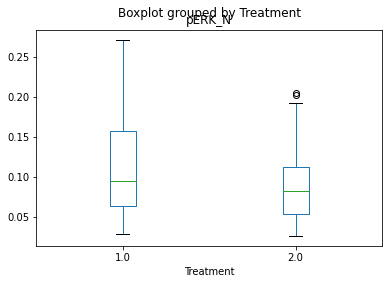

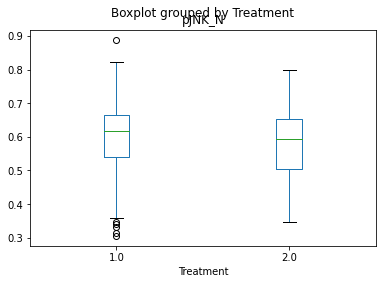

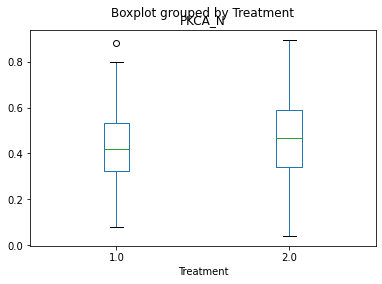

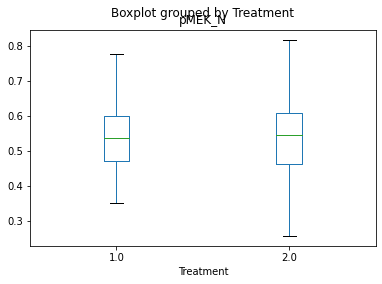

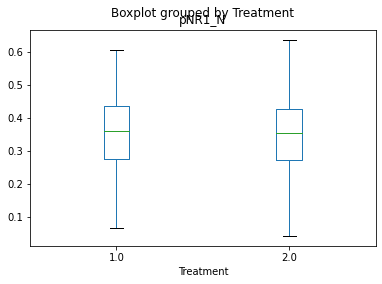

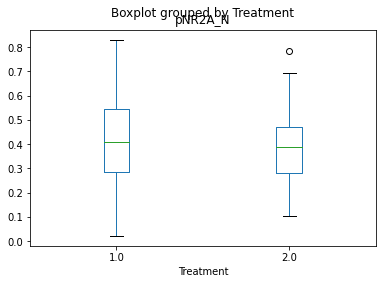

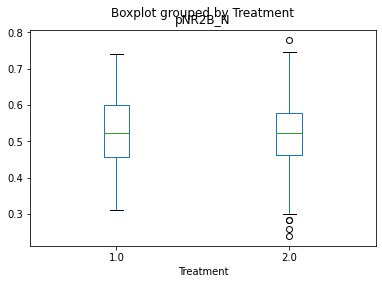

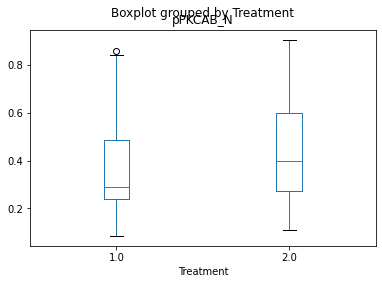

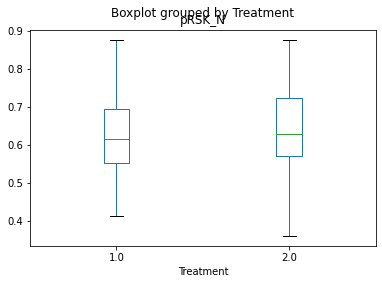

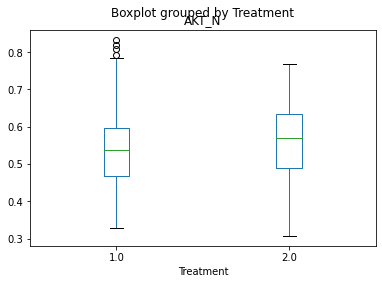

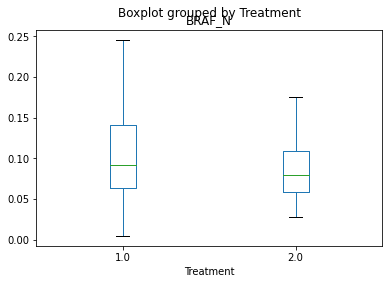

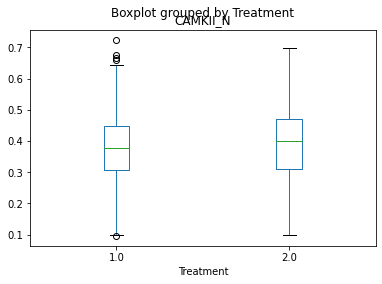

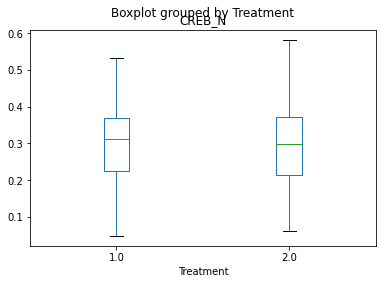

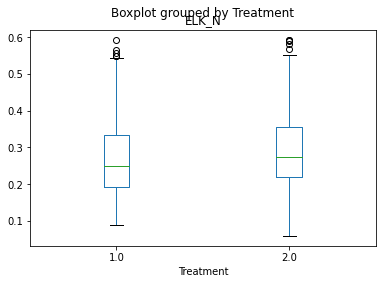

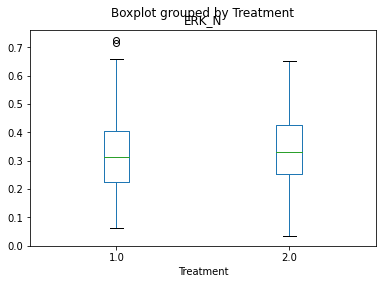

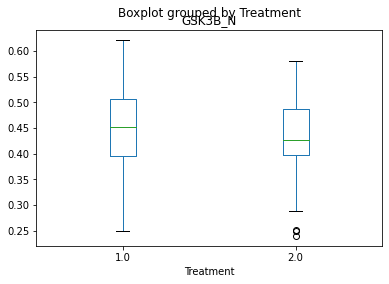

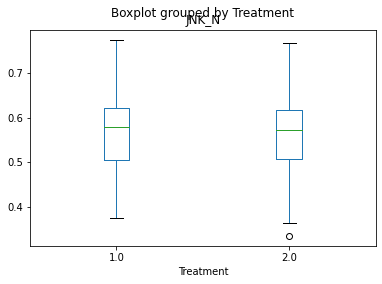

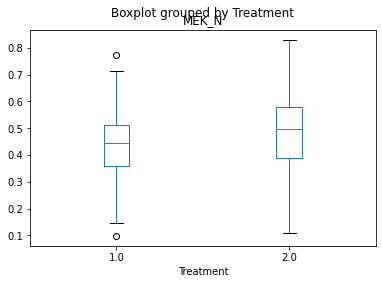

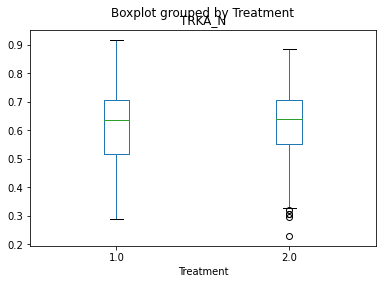

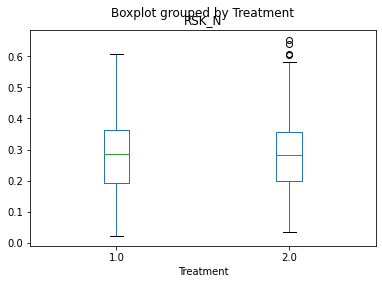

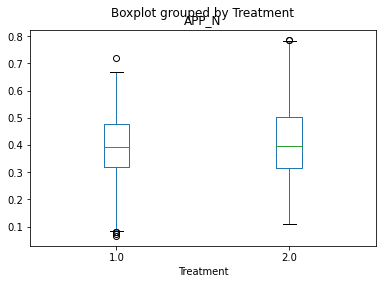

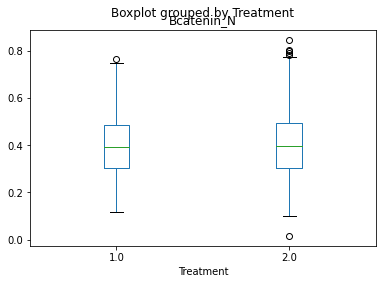

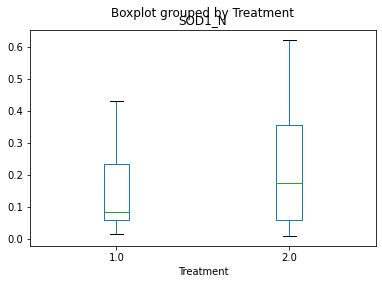

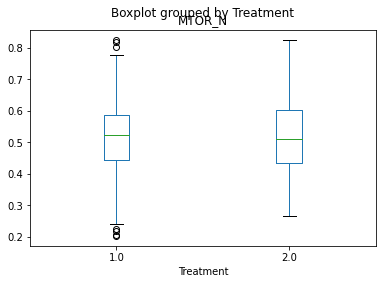

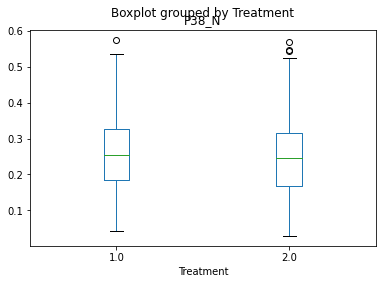

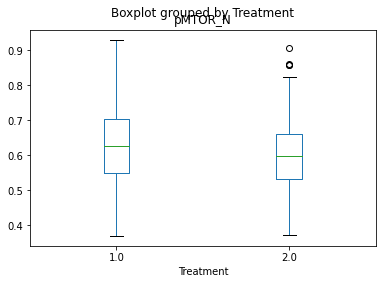

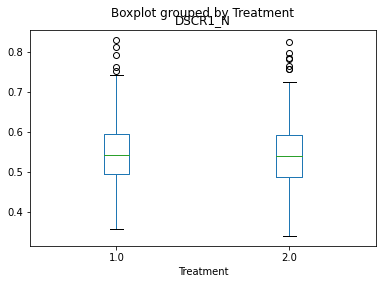

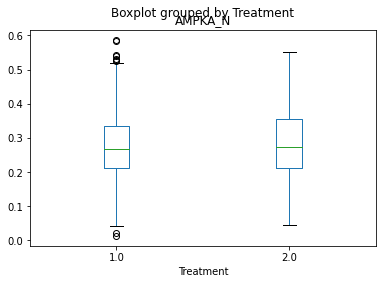

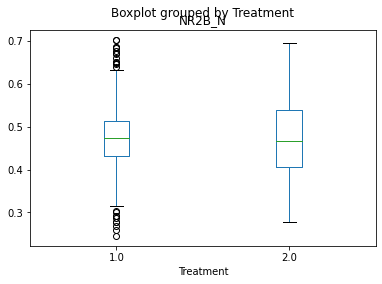

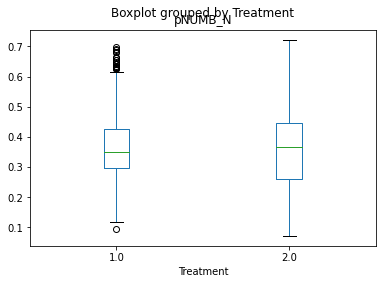

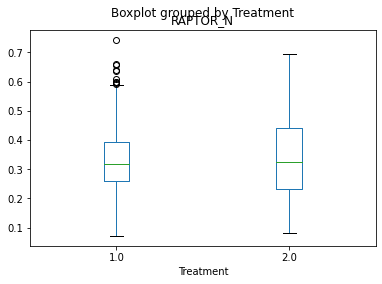

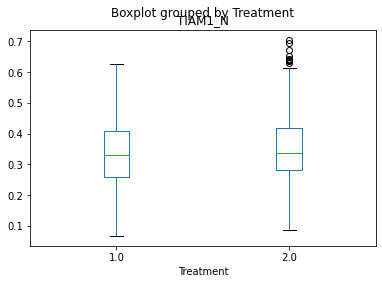

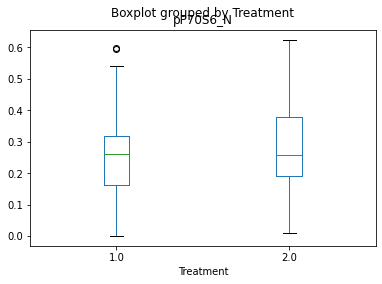

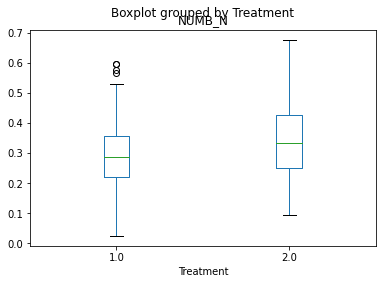

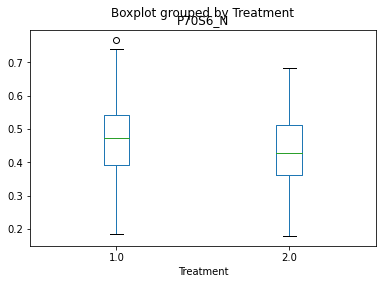

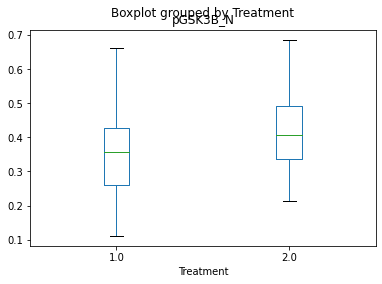

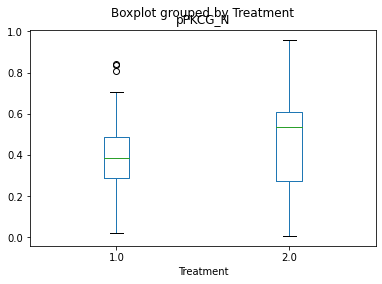

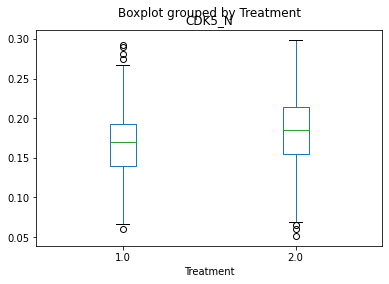

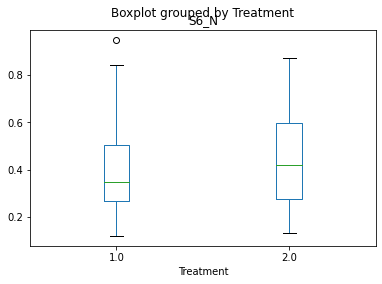

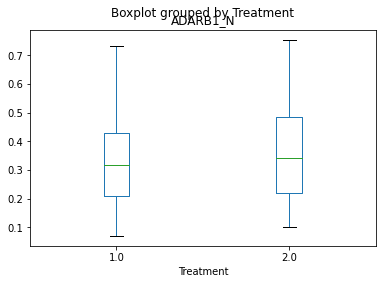

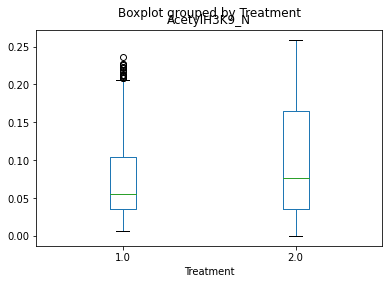

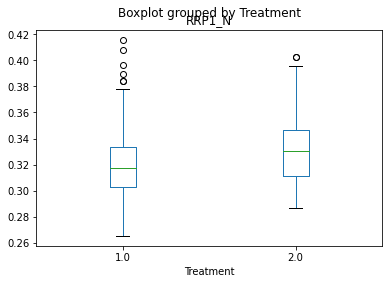

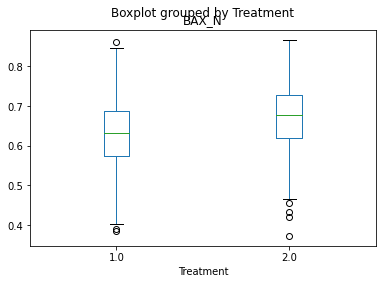

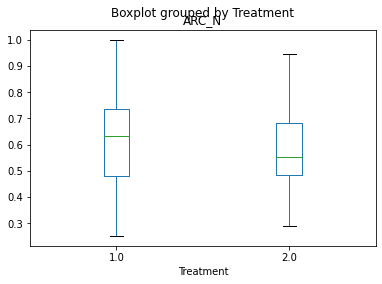

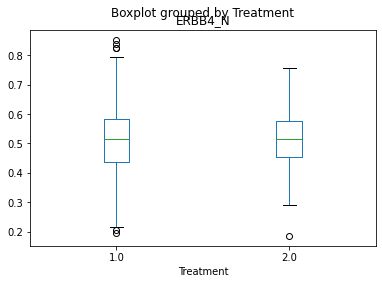

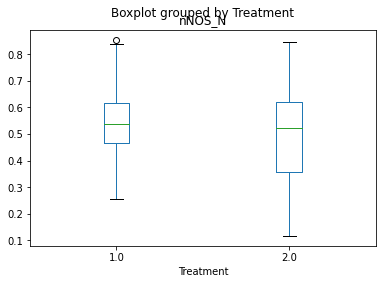

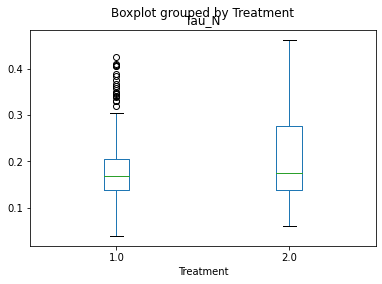

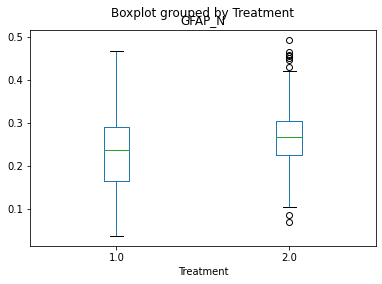

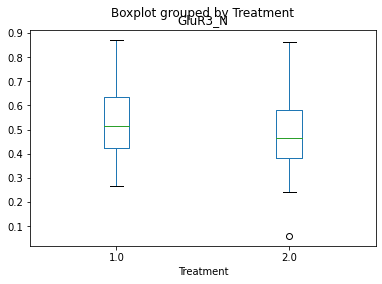

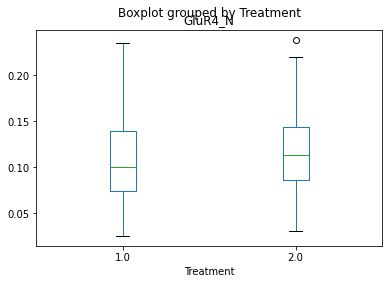

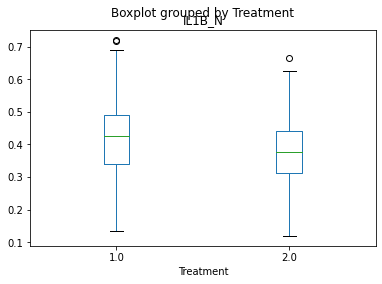

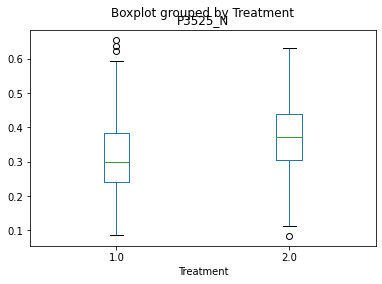

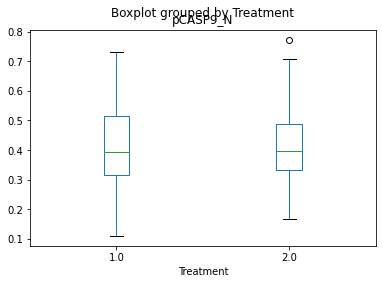

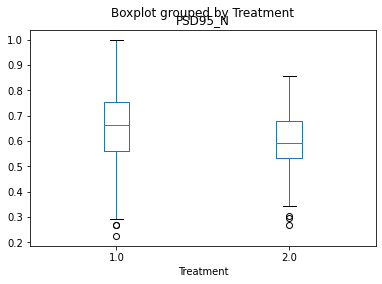

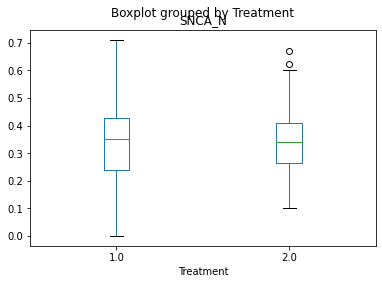

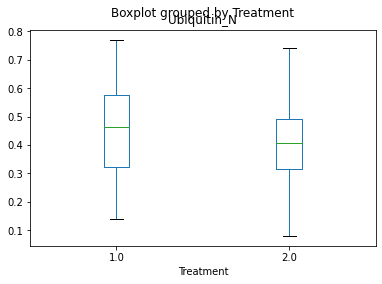

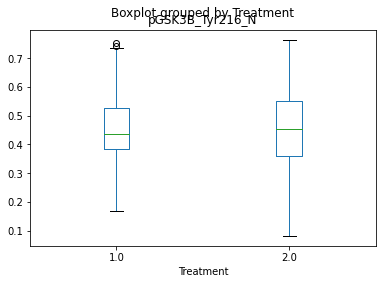

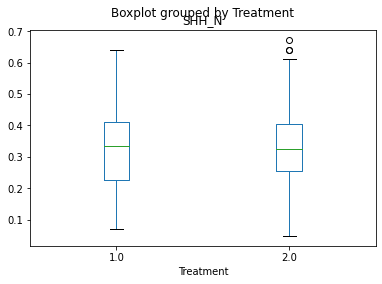

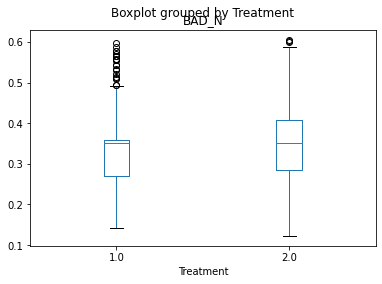

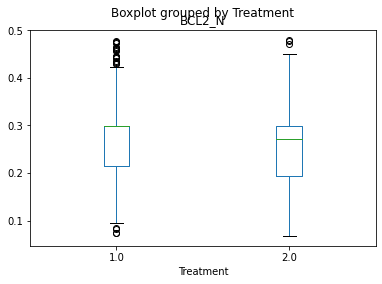

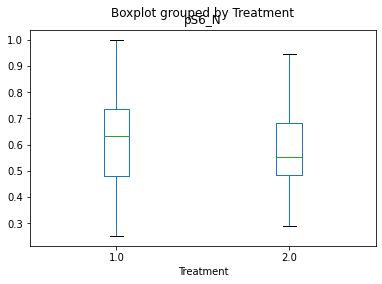

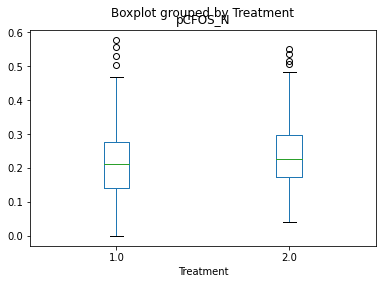

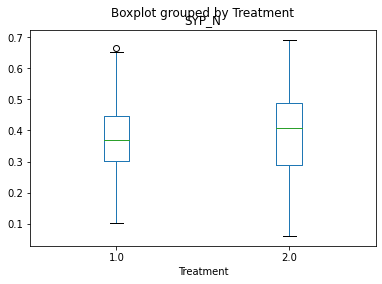

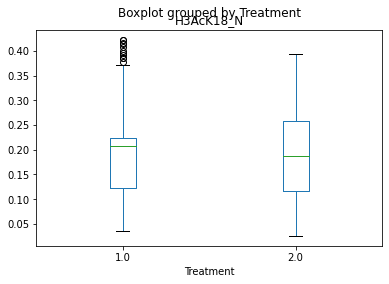

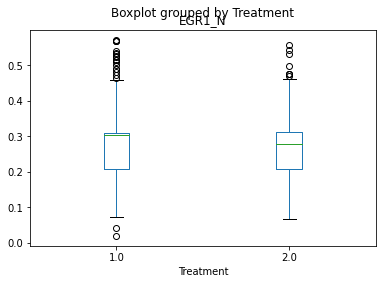

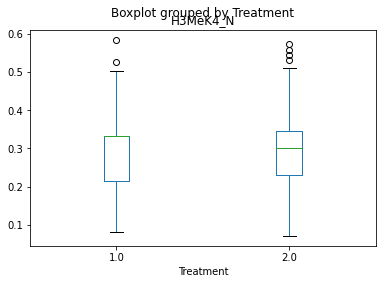

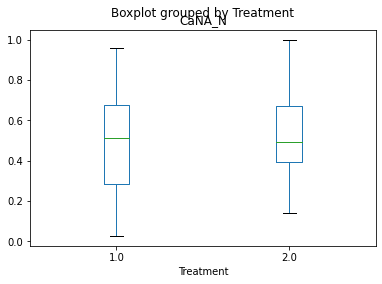

In [ ]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = df_out.drop("Treatment",1)
y_fix = df_out["Treatment"]
columns_name = list(X_fix.columns)

for i in column_name:
  df_out.boxplot(by ='Treatment', column =[i], grid = False) 

## **Feature Importance**

### 1. Univariate Selection

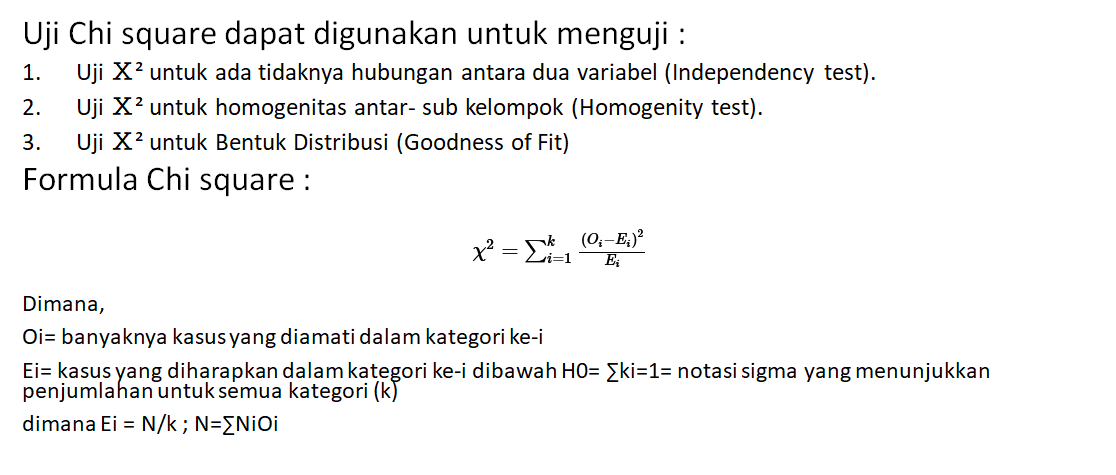

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.iloc[:,1:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Protein Name','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

   Protein Name  chi-square Score  p-values
31   Bcatenin_N          2.801675  0.094166
45     pGSK3B_N          2.734290  0.098215
6       pBRAF_N          1.898900  0.168202
16      pNR2B_N          1.661953  0.197340
44      P70S6_N          1.409616  0.235120
..          ...               ...       ...
28       TRKA_N          0.002484  0.960251
72        SYP_N          0.001596  0.968136
61      P3525_N          0.000075  0.993098
53        ARC_N          0.000012  0.997200
63      PSD95_N          0.000001  0.999087

[76 rows x 3 columns]


### 2. SVM-RFE

In [ ]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

X = df_out.iloc[:,0:1000]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

colnames = X.columns
n_features_to_select = 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(X, y)

y_pred = rfe.predict(X)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 fe

In [ ]:
# Put the mean scores into a Pandas dataframe
df_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
df_rank = df_rank.sort_values('Scores', ascending=False)

In [ ]:
df_rank

Feature  Scores
77  Treatment    1.00
1     ITSN1_N    0.99
19      AKT_N    0.97
25    GSK3B_N    0.96
4      NR2A_N    0.95
..        ...     ...
41    TIAM1_N    0.05
74     EGR1_N    0.04
39    pNUMB_N    0.03
28     TRKA_N    0.01
76     CaNA_N    0.00

[78 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


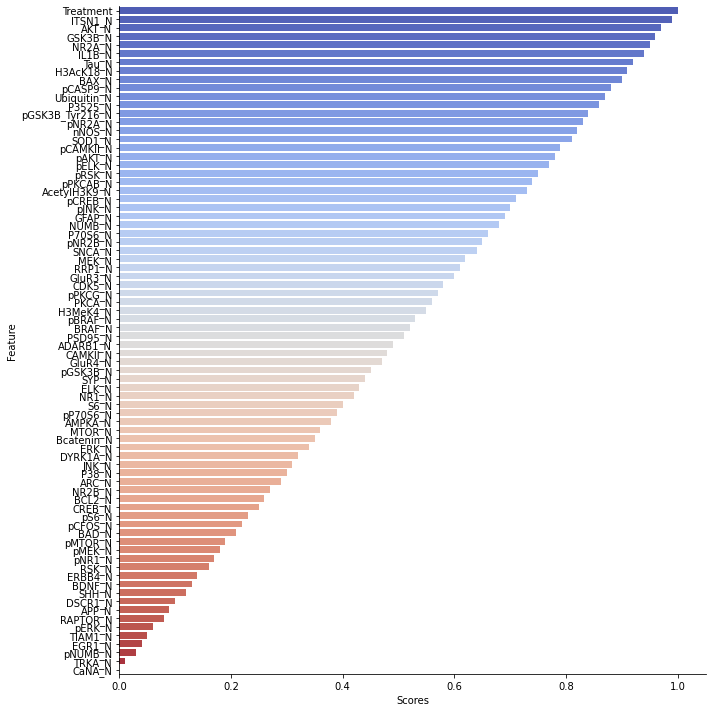

In [ ]:
import seaborn as sns
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = df_rank, kind="bar", 
               size=10, aspect=1, palette='coolwarm')

### 3. Extratrees

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_fix,y_fix)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.01640674 0.01168526 0.00777987 0.00648763 0.00696182 0.01119385
 0.0078727  0.03093032 0.01231142 0.01115495 0.02835652 0.01067088
 0.01122403 0.00980131 0.00940355 0.01510042 0.00539613 0.01680031
 0.01383323 0.01555928 0.027109   0.00877367 0.00974912 0.00791127
 0.00597371 0.01012597 0.00985018 0.01156895 0.00533205 0.00862141
 0.01215024 0.00643018 0.04381651 0.00983516 0.00927325 0.00897225
 0.01030706 0.00645909 0.01248543 0.0172938  0.00954779 0.00975549
 0.01756656 0.01427064 0.01370268 0.02238511 0.03597703 0.01210268
 0.01222438 0.01283112 0.02177738 0.01366327 0.01126053 0.00809139
 0.00811416 0.0241121  0.018372   0.01314399 0.00893782 0.01029539
 0.01372188 0.0174611  0.0104342  0.01203108 0.00837653 0.0219542
 0.01101021 0.00928654 0.00544003 0.00803192 0.01097471 0.00931643
 0.01415038 0.01556822 0.00648099 0.00790373 0.01875782]


ValueError: ignored


### 4. Correlation Matrix with Heatmap

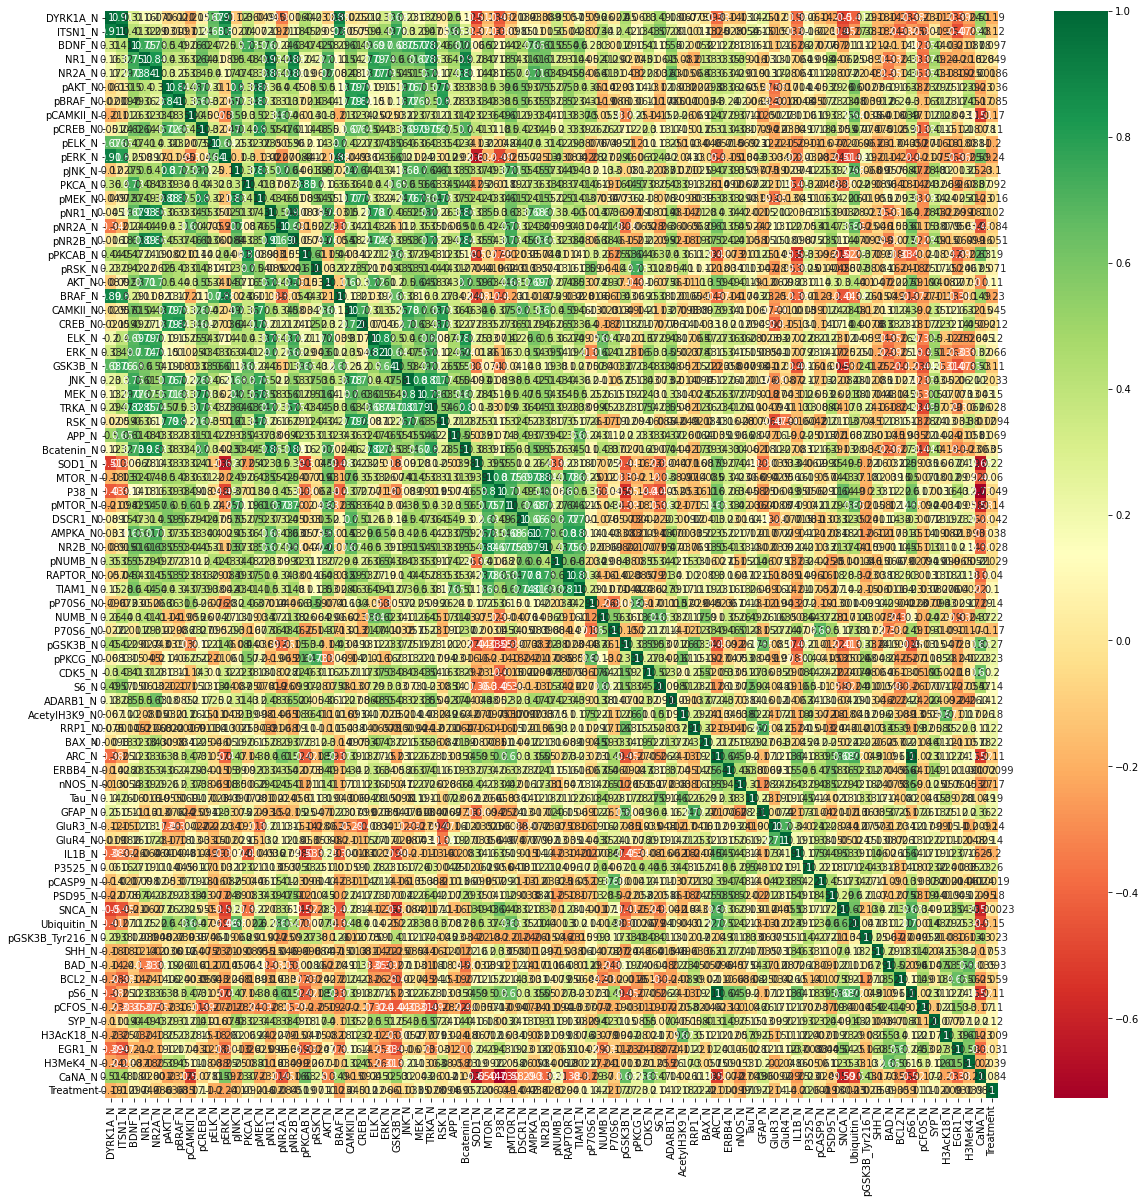

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.iloc[:,0:1000]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature Extraction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis

digits = datasets.load_digits()

X = digits.data
y = digits.target

n_samples, n_features = X.shape

In [ ]:
def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
    plt.xticks([]), plt.yticks([])
    plt.title(title)

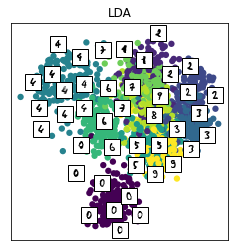

In [ ]:
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
embedding_plot(X_lda, "LDA")
plt.show()

In [ ]:
X_lda

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]])

In [ ]:
#first reduxe de dimensin
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

lda_df = pd.DataFrame(data = lda
             , columns = ['new_var1', 'new_var2'])
finalDf = pd.concat([lda_df, y_fix], axis = 1)
finalDf.head()

new_var1  new_var2  Treatment
0 -2.014632 -5.623486        1.0
1  0.220967  3.592400        1.0
2  2.234855  2.709504        1.0
3  2.760965 -0.624427        1.0
4 -5.845449  1.754015        1.0

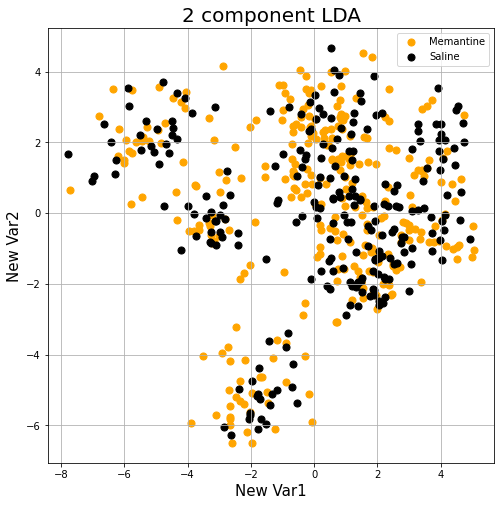

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var1', fontsize = 15)
ax.set_ylabel('New Var2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [1.0,2.0]
colors = ['orange', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Treatment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'new_var1']
               , finalDf.loc[indicesToKeep, 'new_var2']
               , c = color
               , s = 50)
ax.legend(["Memantine", "Saline"])
ax.grid()
